## Note

Usually it's a good practice to apply following formula in order to find out the total number of hidden layers needed.

Nh = Ns/(α∗ (Ni + No))

where

Ni = number of input neurons.

No = number of output neurons.

Ns = number of samples in training data set.

α = an arbitrary scaling factor usually 2-10.


## Our Values

Ni = 8 (features?)

No = 1 (1 target variable)

Ns = 109 (rows)

a = 5 (starting here and can play around with this number)

so Nh ~ 3

In [13]:
import numpy as np
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.layers.core import Dropout



# Importing the dataset
dataset = np.genfromtxt('HS_Regents_Sat_Scores_2015.csv', delimiter=',')
X = dataset[1:, :-4]
y = dataset[1:, -1]
print(y)

[1265. 1367. 1700. 1889. 1704. 1327. 1511. 2144. 1358. 1147. 1292. 1479.
 1116. 1529. 1257. 1388. 1226. 1480. 1781. 1234. 1647. 1556. 1390. 1135.
 1176. 1090. 1194. 1252. 1188. 1182. 1121. 1268. 1223. 1214. 1314. 1276.
 2041. 1291. 2013. 1255. 1407. 1248. 1240. 1192. 1128. 1327. 1182. 1896.
 1216. 1435. 1334. 1188. 1313. 1643. 1179. 1386. 1099. 1327. 1360. 1420.
 1322. 1287. 1285. 1451. 1326. 1580. 1386. 1640. 1404. 1313. 1277. 1224.
 1290. 1211. 1427. 1335. 1431. 1314. 1256. 1981. 1578. 1530. 1184. 1487.
 1326. 1285. 1218. 1214. 1397. 1193. 1410. 1485. 1306. 1457. 1248. 1253.
 1346. 1316. 1265. 1622. 1274. 1245. 1409. 1344. 1284. 1355. 1446. 1473.
 1141.]


Epoch 1/100
100/100 [==============================] - 0s 3ms/step - loss: 1907362.2125
Epoch 2/100
100/100 [==============================] - 0s 264us/step - loss: 1905713.5750
Epoch 3/100
100/100 [==============================] - 0s 235us/step - loss: 1903646.4625
Epoch 4/100
100/100 [==============================] - 0s 271us/step - loss: 1900097.7000
Epoch 5/100
100/100 [==============================] - 0s 255us/step - loss: 1895766.7625
Epoch 6/100
100/100 [==============================] - 0s 244us/step - loss: 1889661.6125
Epoch 7/100
100/100 [==============================] - 0s 287us/step - loss: 1879928.1250
Epoch 8/100
100/100 [==============================] - 0s 286us/step - loss: 1864405.4250
Epoch 9/100
100/100 [==============================] - 0s 241us/step - loss: 1842178.4875
Epoch 10/100
100/100 [==============================] - 0s 292us/step - loss: 1814452.4250
Epoch 11/100
100/100 [==============================] - 0s 287us/step - loss: 1759695.5375
Epoch 12/1

100/100 [==============================] - 0s 359us/step - loss: 22813.5536
Epoch 93/100
100/100 [==============================] - 0s 434us/step - loss: 23374.1802
Epoch 94/100
100/100 [==============================] - 0s 437us/step - loss: 19201.6479
Epoch 95/100
100/100 [==============================] - 0s 383us/step - loss: 19846.1037
Epoch 96/100
100/100 [==============================] - 0s 282us/step - loss: 17574.2919
Epoch 97/100
100/100 [==============================] - 0s 397us/step - loss: 17742.9338
Epoch 98/100
100/100 [==============================] - 0s 315us/step - loss: 15084.5274
Epoch 99/100
100/100 [==============================] - 0s 327us/step - loss: 15632.1034
Epoch 100/100
100/100 [==============================] - 0s 335us/step - loss: 17867.8055


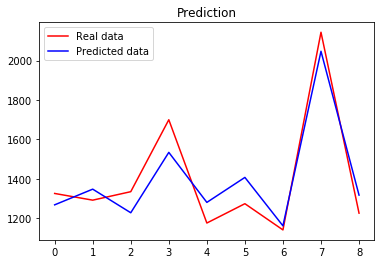

In [14]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.08, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initialising the ANN
model = Sequential()

model.add(Dropout(0.25))
# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 8))

# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer

model.add(Dense(units = 1))

#model.add(Dense(1))
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size = 10, epochs = 100)

y_pred = model.predict(X_test)

plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()



Using Dropout Regularization
https://www.analyticsvidhya.com/blog/2018/04/fundamentals-deep-learning-regularization-techniques/

Others available from keras:
https://keras.io/regularizers/


This is the one of the most interesting types of regularization techniques. It also produces very good results and is consequently the most frequently used regularization technique in the field of deep learning.

To understand dropout, let’s say our neural network structure is akin to the one shown below:


So what does dropout do? At every iteration, it randomly selects some nodes and removes them along with all of their incoming and outgoing connections as shown below.



So each iteration has a different set of nodes and this results in a different set of outputs. It can also be thought of as an ensemble technique in machine learning.

Ensemble models usually perform better than a single model as they capture more randomness. Similarly, dropout also performs better than a normal neural network model.

This probability of choosing how many nodes should be dropped is the hyperparameter of the dropout function. As seen in the image above, dropout can be applied to both the hidden layers as well as the input layers.

Source: chatbotslife
Due to these reasons, dropout is usually preferred when we have a large neural network structure in order to introduce more randomness.

In keras, we can implement dropout using the keras core layer. Below is the python code for it:

from keras.layers.core import Dropout

model = Sequential([
 Dense(output_dim=hidden1_num_units, input_dim=input_num_units, activation='relu'),
 Dropout(0.25),

Dense(output_dim=output_num_units, input_dim=hidden5_num_units, activation='softmax'),
 ])
As you can see, we have defined 0.25 as the probability of dropping. We can tune it further for better results using the grid search method.